### Importing required libraries

In [32]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree
import matplotlib.pyplot as plt
import sklearn

import time

### Reading the input file

In [33]:

df = pd.read_csv('data/output/output.csv')
print(len(df))

48740


### Checking count of each opening

In [34]:
print(df['Opening'].value_counts())

sicilian_rossolimo        25710
four_knights              10066
caro_kann_classic          9616
sicilian_dragon_other6     1752
qid4e3                     1596
Name: Opening, dtype: int64


### Replacing Opening and game result with numerical values

In [35]:
df.replace({'Opening': {'sicilian_rossolimo':1, 'caro_kann_classic':2, 'sicilian_dragon_other6':3, 'four_knights':4, 'qid4e3':5}}, inplace=True)
df.replace({'game_result': {'draw':0, 'white':1, 'black':2}}, inplace=True)

### Decision Tree Based on Opening, WhiteElo and BlackElo

#### Splitting the data into train and test

In [36]:
def prep_training(df, first_n_moves):
    
    x = df[['WhiteElo', 'BlackElo', 'Opening']]
    y = df.iloc[:, 10]
    print("__________________________________________")
    print("Shape of x: ", x.shape)
    print("Shape of y: ", y.shape)
   
    return sklearn.model_selection.train_test_split(x, y, test_size=0.2)

In [37]:
x_train, x_test, y_train, y_test = prep_training(df, 4)
print("*********")
print(x_train, x_test, y_train, y_test)

__________________________________________
Shape of x:  (48740, 3)
Shape of y:  (48740,)
*********
       WhiteElo  BlackElo  Opening
29081    2531.0    2533.0        1
5047     2252.0    2097.0        4
36295    2181.0    2275.0        1
36713    2420.0    2381.0        1
15615    2000.0    2097.0        2
...         ...       ...      ...
33452    2464.0    2559.0        1
24600    2270.0    2095.0        1
40957    2342.0    2529.0        1
27665    2137.0    2400.0        1
26417    2215.0    2280.0        1

[38992 rows x 3 columns]        WhiteElo  BlackElo  Opening
9333     2357.0    2378.0        4
3253     2387.0    2249.0        4
31127    2436.0    2238.0        1
3068     2590.0    2142.0        4
43451    2446.0    2510.0        1
...         ...       ...      ...
40875    2517.0    2370.0        1
42142    2452.0    2071.0        1
25626    2245.0    2565.0        1
35834    2635.0    2721.0        1
48736    2020.0    2073.0        3

[9748 rows x 3 columns] 29081    0

#### Building decision tree
##### Finding accuracy 

In [38]:
def build_decision_tree(depth):
    print("\nDepth: " +str(depth))

    #  1. create a model
    clf = DecisionTreeClassifier(max_depth =depth) #max_depth = depth

    #  2. feed training data into the model
    clf = clf.fit(x_train,y_train)

    #  3. predict values for your test data
    y_pred = clf.predict(x_test)
    
    #class_n = ['result']
    plt.figure(figsize=(12,12))  # set plot size
    class_n = ['draw', 'white', 'black']
    tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n);
    plt.show()

    #  5. find the training and testing accuracy
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Depth: 12


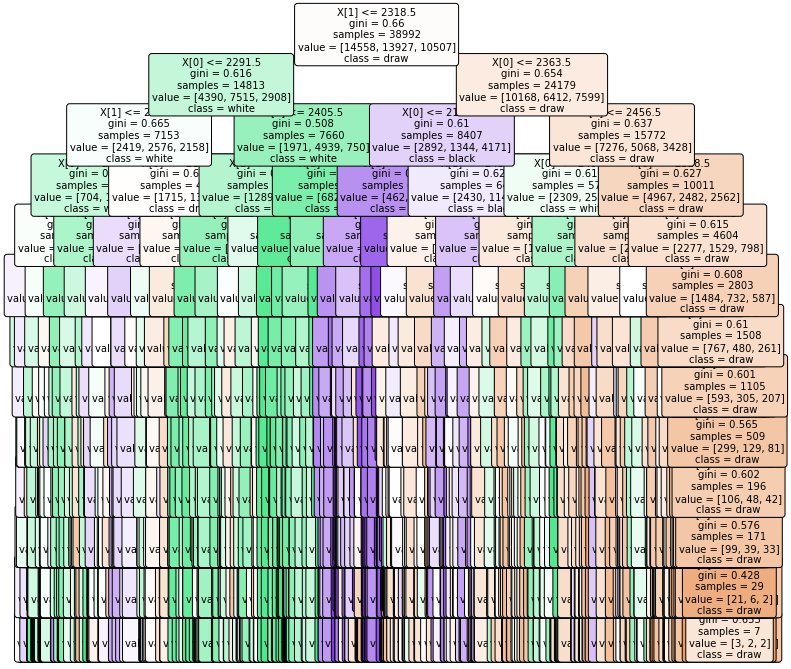

Accuracy: 0.5025646286417726

Time:
99.62508010864258

Depth: 20


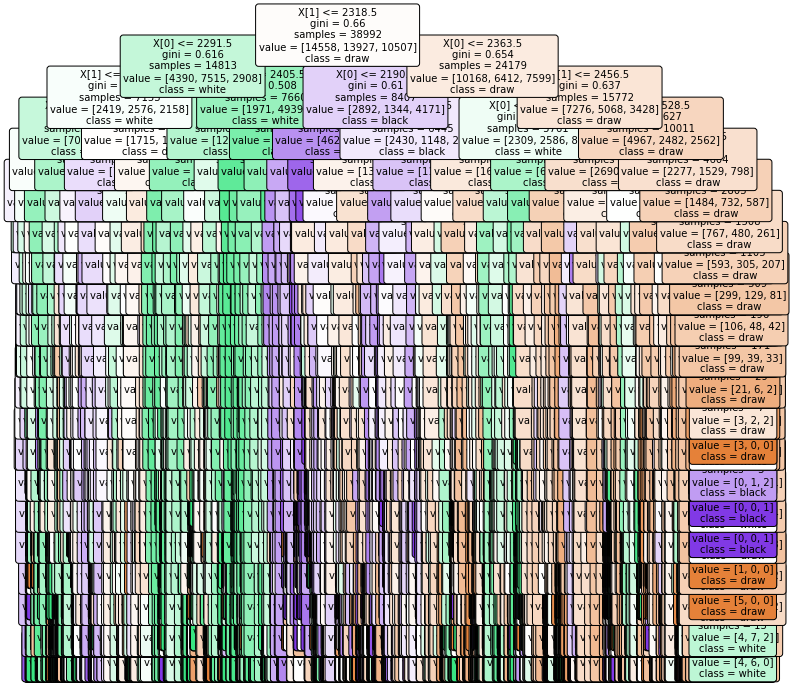

Accuracy: 0.44511694706606486

Time:
520.7179992198944

Depth: 40


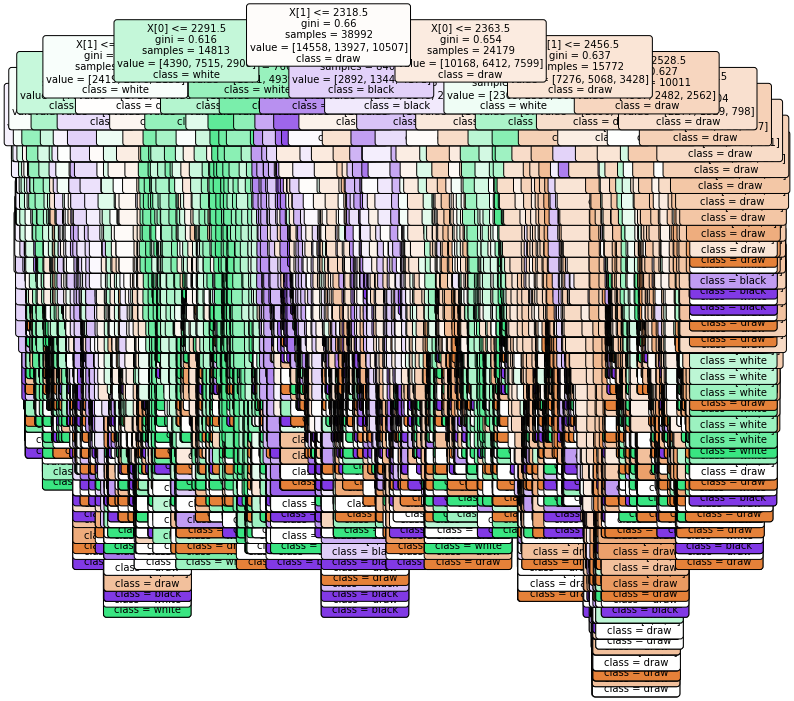

Accuracy: 0.43475584735330325

Time:
628.3494839668274


In [39]:
for depth in [12, 20, 40]:
    start = time.time()
    build_decision_tree(depth)
    end = time.time()
    print('\nTime:')
    print(end - start)

### Decision Tree for First "X" moves, Opening, WhiteElo, BlackElo
#### Here data is split with same type of first "X" moves and then Decision Tree is applied 

In [40]:
for value in [10,20, 25, 30]:
    build_decision_tree_for_firstXmoves(value)


=================================== First 10 moves ===================================
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 Qe7+ Qe2 Qxe2+ Kxe2 Nxd5
Key length:  29
Accuracy:  0.49743537135822735
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Nxd4 exd4 e5 dxc3 exf6 Qxf6 dxc3 Qe5+ Qe2 Qxe2+ Bxe2 d5
Key length:  53
Accuracy:  0.5051292572835453
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 Bb4 Nxe5 Qe7 Nxc6 Qxe4+ Qe2 dxc6 Bd2 Qxe2+ Bxe2 Bf5 O-O-O O-O-O
Key length:  10
Accuracy:  0.5042059909725072
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nd5 Nb4 Bc4 Nbxd5 exd5 Bb4+ Bd2 Qe7+ Qe2 Bxd2+ Kxd2 Qxe2+
Key length:  14
Accuracy:  0.5077964710709889
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 d5 exd5 Qe7+ Qe2 Qxe2+ Kxe2 cxd5
Key length: 

Accuracy:  0.5061551087402544
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 g3 d5 exd5 Nxd5 Bg2 Nxc3 bxc3 Bc5 O-O O-O d3 Bg4 h3 Bh5
Key length:  21
Accuracy:  0.5077964710709889
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 O-O Nxb5 Nxb5 c6 Nc3 d6 d4 Qc7 h3 Be7 a4 O-O
Key length:  14
Accuracy:  0.49958965941731637
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 d4 exd4 Nxd4 Bb4 Nxc6 bxc6 Bd3 O-O O-O Re8 Qf3 Bd6 Bf4 Bxf4
Key length:  20
Accuracy:  0.5034878949528109
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Nd4 Bc4 Bc5 Nxe5 Qe7 Nf3 d5 Bxd5 Bg4 d3 O-O-O Be3 Nxd5
Key length:  10
Accuracy:  0.49938448912597455
_________________________________________________
Key:  e4 e5 Nf3 Nc6 Nc3 Nf6 Bb5 Bb4 O-O O-O d3 d6 Bg5 Ne7 Nh4 c6 Bc4 d5 Bb3 a5
Key length:  12
Accuracy:  0.5097455888387361
_________________________________________________
Key:  e4 e5 Nf3 Nc6

Accuracy:  0.5036930652441527
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 Nd7 Bd3 Bxd3 Qxd3 e6 Bd2 Qc7
Key length:  10
Accuracy:  0.5113869511694706
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 Nf6 Ne5 Bh7 Bc4 e6 Qe2 Nd5
Key length:  55
Accuracy:  0.4910750923266311
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nh3 e6 Nf4 Bh7 Bc4 Nf6 Qe2 Bd6
Key length:  10
Accuracy:  0.49620434961017645
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 Nf3 e6 h4 h6 h5 Bh7 Bd3 Bxd3 Qxd3 Nf6
Key length:  49
Accuracy:  0.5032827246614691
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nh3 e6 Nf4 Bh7 Bc4 Nf6 O-O Bd6
Key length:  19
Accuracy:  0.5112843660237998
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4

Accuracy:  0.49374230611407466
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 c3 O-O d4 cxd4 cxd4 d5 e5 Ne4 Bxc6 bxc6
Key length:  14
Accuracy:  0.49599917931883464
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 O-O Nc3 Nc7 Bf4 Nxb5
Key length:  25
Accuracy:  0.5002051702913418
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Bxc6 Bxc6 d4 Bxe4 Bg5 Bd5 Nbd2 e6
Key length:  12
Accuracy:  0.5072835453426344
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 c3 Nf6 e5 Nd5 d4 cxd4 cxd4 O-O Nc3 Nc7 Ba4 d6
Key length:  21
Accuracy:  0.5
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 c3 Nf6 Re1 a6 Bf1 Bg4 h3 Bxf3 Qxf3 g6 d3 Bg7
Key length:  12
Accuracy:  0.5016413623307345
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-O Bg7 Re1 Nf6 

Accuracy:  0.5059499384489126
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 e6 O-O Nge7 Re1 a6 Bf1 Ng6 c3 Be7 d4 cxd4 cxd4 d5 e5 O-O
Key length:  17
Accuracy:  0.4953836684448092
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Be3 b6 Qd2 Re8 Bh6 Bh8
Key length:  22
Accuracy:  0.5002051702913418
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 d6 Nc3 f6
Key length:  19
Accuracy:  0.5067706196142798
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 c3 O-O d4 cxd4 cxd4 d5 e5 f6
Key length:  154
Accuracy:  0.5023594583504308
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 O-O Be3 b6 Qd2 e5 Bh6 Qd6
Key length:  121
Accuracy:  0.5086171522363562
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 O-

Accuracy:  0.4990767336889618
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bf1 Bg4 d3 e6 Nbd2 Nd7 h3 Bh5
Key length:  16
Accuracy:  0.48727944193680756
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 d6 O-O Bd7 Re1 Nf6 c3 a6 Bxc6 Bxc6 d4 Bxe4 Bg5 Bd5 c4 Bxf3
Key length:  10
Accuracy:  0.4984612228149364
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 bxc6 O-O Bg7 Re1 Nh6 h3 O-O c3 f6 d4 cxd4 cxd4 Nf7
Key length:  12
Accuracy:  0.49825605252359456
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 Nd7 Be3 e5 Qd2 h6 Nh2 Qe7
Key length:  28
Accuracy:  0.5028723840787854
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 d3 Bg7 h3 Nf6 Nc3 Nd7 Be3 e5 Qd2 Qe7 O-O Nf8
Key length:  17
Accuracy:  0.506668034468609
_________________________________________________
Key:  e4 c5 Nf3 Nc6 Bb5 g6 Bxc6

Accuracy:  0.5028723840787854
_________________________________________________
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be3 O-O Qd2 Nc6 O-O-O Nxd4 Bxd4 Be6
Key length:  15
Accuracy:  0.489023389413213
_________________________________________________
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be3 Nc6 Qd2 O-O O-O-O d5 exd5 Nxd5
Key length:  11
Accuracy:  0.4971276159212146
_________________________________________________
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f3 Bg7 Be3 O-O Qd2 Nc6 O-O-O d5 Qe1 e5
Key length:  11
Accuracy:  0.5134386540828888
_________________________________________________
Key:  e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 Bg5 Bg7 Bb5+ Bd7 Qe2 O-O O-O-O a6 Bxd7 Nbxd7
Key length:  13
Accuracy:  0.4943578169881001

=================================== First 20 moves ===================================
_________________________________________________
Key:  e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 h4 h6 Nf3 Nd7 h5 Bh7 Bd3 Bxd3 Qxd3 e6 Bf4 Ngf6 O-O-O Be7 Kb1 O-O

In [41]:
def build_decision_tree_for_firstXmoves(x):
    
    print(f"\n=================================== First {x} moves ===================================")
    npData = df.to_numpy()
    firstXDict = {}

    # Getting rows as value of dictionary, where key is firstX moves

    for row in range(len(npData)):
        moves = npData[row][7] # index of moves
        movesList = moves.split()

        #firstTwo = " ".join(movesList[0:4]) # Moves 0, 1 
        firstX = " ".join(movesList[0:x*2]) 

        if firstX in firstXDict.keys():
            firstXDict[firstX].append(row)
        else:
            firstXDict[firstX] = [row]


    # Going through each key and
    for key in firstXDict.keys():

        if len(firstXDict[key]) >= 10:

            trainingIndices = firstXDict[key][0:(int)(len(firstXDict[key]) * 0.8)]
            testingIndices = firstXDict[key][len(trainingIndices):len(firstXDict[key])]

            print("_________________________________________________")
            print("Key: ", key)
            print("Key length: ",len(firstXDict[key]))


            x = df[['WhiteElo', 'BlackElo', 'Opening']]
            y = df.iloc[:, 10]

            x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2)
            clf = DecisionTreeClassifier(max_depth=12)
            clf.fit(x_train, y_train)

            y_pred = clf.predict(x_test)


            print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

    #         plt.figure(figsize=(12,12))  # set plot size
    #         class_n = ['draw', 'white', 'black']
    #         feature_cols = ['white_elo', 'black_elo', 'opening']
    #         tree.plot_tree(clf, filled = True, fontsize=10,rounded=True,class_names=class_n, feature_names = feature_cols);
    #         plt.show()
